In [66]:
# import package
import numpy as np
import cv2

In [95]:
def four_point_transform(image, pts):
    # unpack 4 point yang telah di dapat
    (tl, tr, bl, br) = pts
    
    # hitung width new image
    # widht dapat dihitung dari x-coordinate
    # br dgn bl, atau tl dgn tr
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    
    # hitung height new image
    heightA = np.sqrt(((br[0] - tr[0]) ** 2) + ((br[1] - tr[1]) ** 2))
    heightB = np.sqrt(((bl[0] - tl[0]) ** 2) + ((bl[1] - tl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    
    # buat matrix new image
    dst = np.float32([
        [0, 0],
        [maxWidth - 1, 0],
        [0, maxHeight - 1],
        [maxWidth - 1, maxHeight - 1]])
    
    # hitung perspective matrix
    M = cv2.getPerspectiveTransform(pts, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    
    return warped

# Implementasi

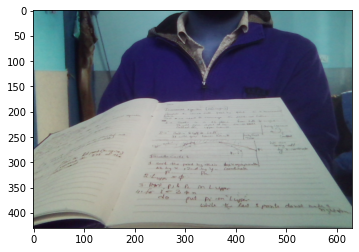

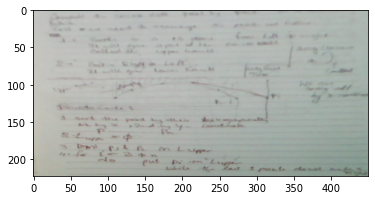

In [98]:
import matplotlib.pyplot as plt

image = cv2.imread("../input/watchjpg/s10.png")
pts = np.float32([[250, 200], [500, 200], [150, 400], [600, 400]]) 


plt.figure()
plt.imshow(image)
plt.show()

warped = four_point_transform(image, pts)

plt.figure()
plt.imshow(warped)
plt.show()